## **[2024년 1학기 로봇공학] Ch. 3-b. 3D Rigid-body Motions**

- 작성자 : 서울시립대학교 전자전기컴퓨터공학부 박경훈 교수(gyunghoon.park@uos.ac.kr)
- 작성일 : 2024. 3. 26.

In [63]:
import spatialmath as sm        # High-level class for Spatial Math Toolbox
from spatialmath.base import *  # Low-level class for Spatial Math Toolbox
import roboticstoolbox as rtb
import numpy as np
from math import *
from scipy import *

import matplotlib.animation as animation
import matplotlib.pyplot as plt
import ffmpeg as mpeg
%matplotlib inline


이번 예제에서는 3차원 상의 강체 움직임을 서술하는 다양한 개념들을 익혀보고자 합니다.
- Peter Corke 교수님이 작성한 [Spatial Math Toolbox for Python](https://github.com/bdaiinstitute/spatialmath-python)과 [Robotics Toolbox for Python](https://petercorke.github.io/robotics-toolbox-python/index.html)을 기반으로 진행합니다.
- 이번 예제의 대부분의 내용은 Peter Corke, Robotics, Vision and Control: Fundamental Algorithms in Python (3\E), Springer를 참고하여 제작하였습니다.

### **Topic 1 : Euler Angle**

Euler angle은 강체의 자세를 표현하는 다양한 방법들 중 하나로, ZYZ Euler angle, ZYX Euler angle을 대표적으로 많이 사용합니다.\
Robotics Toolbox for Python에서는 ZYZ Euler angle을 기본으로 사용하며, 다양한 자세 표현법들 사이의 변환 함수를 제공합니다.\
예를 들어, eul2r() 함수를 이용하면 Euler angle로부터 rotation matrix를 쉽게 도출할 수 있습니다.

In [64]:
R1 = rotz(0.1) @ roty(0.2) @ rotz(0.3)
R2 = eul2r(0.1, 0.2, 0.3)
print("R1 :\n",R1)
print("R2 :\n",R2)

R1 :
 [[ 0.902113   -0.38355704  0.19767681]
 [ 0.3875172   0.92164909  0.01983384]
 [-0.18979606  0.0587108   0.98006658]]
R2 :
 [[ 0.902113   -0.38355704  0.19767681]
 [ 0.3875172   0.92164909  0.01983384]
 [-0.18979606  0.0587108   0.98006658]]


ZYZ Euler angle $(\alpha,\beta,\gamma)$에 해당하는 rotation matrix는 $R_{\rm ZYZ} = {\rm Rot}(\hat{z},\alpha){\rm Rot}(\hat{y},\beta){\rm Rot}(\hat{z},\gamma)$입니다.\
3개의 rotation matrix가 post-multiplication의 형식으로 곱해지기 때문에, frame을 곱해진 순서대로 3번 회전시킨 결과물이 rotation matrix가 나타내는 자세입니다.\
이를 확인하기 위해 rotation matrix들을 순서대로 곱해가며 frame의 변화를 살펴봅시다.

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

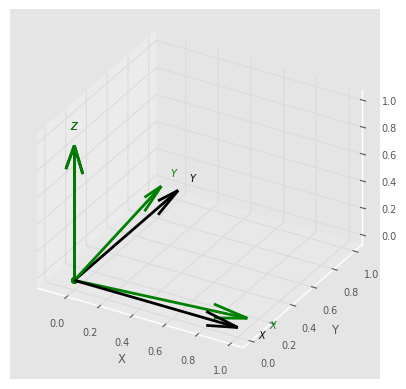

In [65]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

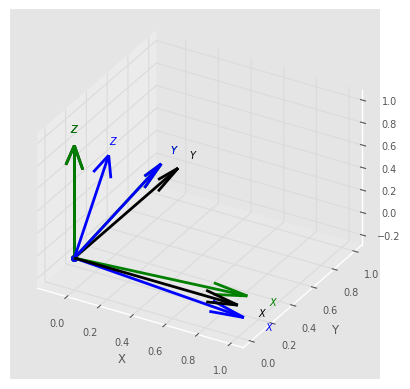

In [66]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(rotz(0.1) @ roty(0.2), color = "blue", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

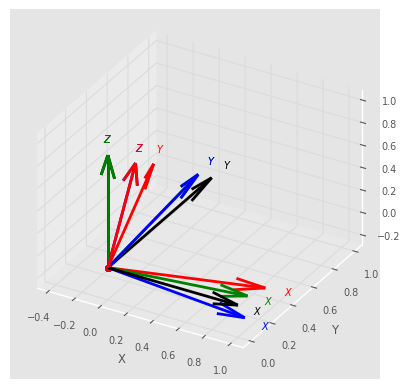

In [67]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(rotz(0.1) @ roty(0.2), color = "blue", width=2)
trplot(rotz(0.1) @ roty(0.2) @ rotz(0.3), color = "red", width=2)

최종적으로 빨간 색으로 표현된 frame이 ZYZ Euler angle $(0.1,0.2,0.3)$이 나타내는 자세입니다. 

한편 (당연하게도) Robotics Toolbox에서는 아래와 같이 rotation matrix로부터 Euler angle로의 변환도 지원하고 있습니다. 

In [68]:
eulAngle = tr2eul(R1)
print("ZYZ Euler angle for R1 :",eulAngle)

ZYZ Euler angle for R1 : [0.1 0.2 0.3]


### **Topic 2 : Roll-pitch-yaw Angle**

강체의 자세를 표현할 때, Euler angle과 유사한 개념으로 roll-pitch-yaw angle을 고려할 수 있습니다.\
Euler angle과의 결정적인 차이점은, roll-pitch-yaw angle은 body frame이 아니라 space frame을 기준으로 회전한 결과를 표현한다는 점입니다.\
즉, XYZ roll-pitch-yaw angle $(\alpha,\beta,\gamma)$는 ($\alpha\rightarrow \beta\rightarrow \gamma$ 순서가 아니라 반대 순서대로 rotation matrix가 곱해진) $R = {\rm Rot}(\hat{x},\gamma){\rm Rot}(\hat{y},\beta){\rm Rot}(\hat{z},\alpha)$에 해당하는 자세를 나타냅니다.\
이는 아래 연산을 통해 쉽게 확인 가능합니다.

In [69]:
R3 = rotx(0.3) @ roty(0.2) @ rotz(0.1)
R4 = rpy2r(0.1, 0.2, 0.3, order = "xyz")
print("R3 :\n",R3)
print("R4 :\n",R4)

R3 :
 [[ 0.97517033 -0.0978434   0.19866933]
 [ 0.153792    0.94470249 -0.28962948]
 [-0.15934508  0.31299183  0.93629336]]
R4 :
 [[ 0.97517033 -0.0978434   0.19866933]
 [ 0.153792    0.94470249 -0.28962948]
 [-0.15934508  0.31299183  0.93629336]]


Euler angle의 경우와 마찬가지로 아래와 같이 회전의 과정을 세분화하여 살펴봅시다.

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

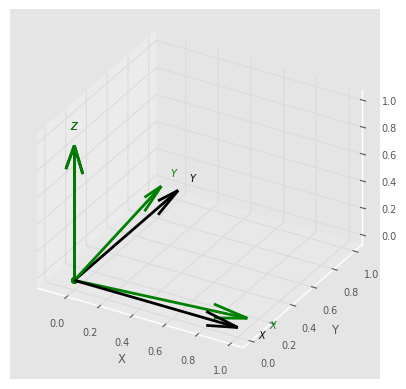

In [70]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

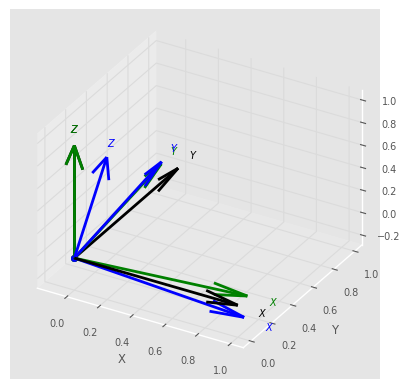

In [71]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(roty(0.2) @ rotz(0.1), color = "blue", width=2)

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

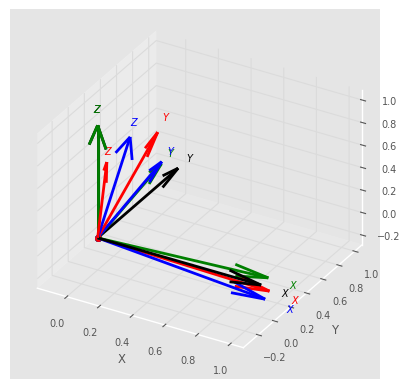

In [72]:
trplot(rotz(0), color = "black", width=2)
trplot(rotz(0.1), color = "green", width=2)
trplot(roty(0.2) @ rotz(0.1), color = "blue", width=2)
trplot(rotx(0.3) @ roty(0.2) @ rotz(0.1), color = "red", width=2)

마찬가지로 rotation matrix로부터 RPY angle을 역으로 구해내는 함수도 제공합니다.

In [73]:
RPYAngle = tr2rpy(R4, order = "xyz")
print("XYZ roll-pitch-yaw angle for R3 (= ZYX Euler angle) :",RPYAngle)

XYZ roll-pitch-yaw angle for R3 (= ZYX Euler angle) : [0.1 0.2 0.3]


### **Topic 3 : 3D Homogeneous Transformation**

3차원 공간에서의 homogeneous transformation 역시, 2차원 예시와 유사하게 transl() 함수와 trotx(), troty(), trotz() 함수 등을 적절히 조합하여 정의할 수 있습니다.\
(2차원 공간과는 달리 회전축이 z축으로 고정되지 않았기 때문에, 다양한 형태의 trot() 함수들이 제공됩니다.)\
아래 예시를 살펴봅시다.

In [74]:
T = transl(2, 0, 0) @ trotx(pi / 2) @ transl(0, 1, 0)
print(T)

[[ 1.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00  6.123234e-17]
 [ 0.000000e+00  1.000000e+00  6.123234e-17  1.000000e+00]
 [ 0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00]]


위의 $T$는 trplot()을 이용하여 3차원 공간에 그릴 수 있습니다.

<Axes3D: xlabel='X', ylabel='Y', zlabel='Z'>

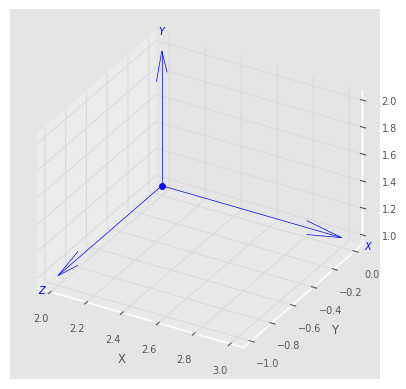

In [75]:
trplot(T)

이때 t2r(), transl() 함수 등을 사용하면, $T = \begin{bmatrix} R & p\\ 0 & 1\end{bmatrix}$을 구성하는 rotation matrix $R$과 translation vector $p$를 따로 뽑아낼 수도 있습니다.

In [76]:
print("Rotation matrix in T :\n", t2r(T))
print("Translation vector in T :\n", transl(T))

Rotation matrix in T :
 [[ 1.000000e+00  0.000000e+00  0.000000e+00]
 [ 0.000000e+00  6.123234e-17 -1.000000e+00]
 [ 0.000000e+00  1.000000e+00  6.123234e-17]]
Translation vector in T :
 [2.000000e+00 6.123234e-17 1.000000e+00]


### **Topic 4 : 3D Twist and 3D Screw Axis**

이제부터는 screw theory의 핵심인 3D Twist에 대한 함수들을 살펴보겠습니다.\
앞서 정의한 homogeneous transformation $T \in {\rm SE}(3)$를 $T = e^{[\mathcal{V}]}$의 형태로 표현하는 3D Twist $\mathcal{V}$를 다음과 같이 계산합시다.

In [77]:
L = linalg.logm(T)
V = vexa(L)
print("Twist vector for T :\n",V)

Twist vector for T :
 [2.         0.78539816 0.78539816 1.57079633 0.         0.        ]


일반적으로 3D (spatial) twist $\mathcal{V}=(\omega,v)$는 $${\mathcal{V}} = \begin{bmatrix} \omega\\v \end{bmatrix} = \begin{bmatrix} \hat{s}\dot{\theta}\\ -\hat{s}\dot{\theta} \times q + h \hat{s}\dot{\theta} \end{bmatrix}$$의 형태로 표현되며, 각각의 구성요소들은 다음을 의미합니다.
- Rate of rotation $\dot{\theta}$ : 회전 속도
- Rotation axis vector $\hat{s}$ : 회전축의 방향을 나타내는 단위벡터
- Position vector $q$ : 회전축이 지나가는 점들 중 하나
- Screw pitch $h$ : Linear velocity와 angular velocity의 비율

여기서 $\dot{\theta} = 1$인 twist를 특별히 *screw*라고 부릅니다. 

Spatial Math Toolbox에서는 high-level class 중 $\mathtt{Twist3.UnitRevolute}(\hat{s}$,$q$,$h$) 함수를 이용하여 screw axis를 정의할 수 있습니다.

In [78]:
sHat = [0, 0, 1]
q = [2, 3, 2]
h = 0.5
S = sm.Twist3.UnitRevolute(sHat, q, h)

이제 $X_0 = {\rm Trans}(\begin{bmatrix}3\\4\\-4\end{bmatrix})$를 위의 screw axis로 회전시키고자 합니다.\
회전시키기 전의 회전축과 $X_0$를 3차원 공간에 표현하면 아래와 같습니다.

Axes3D(0.125,0.11;0.775x0.77)


[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x1ab531f2960>]]

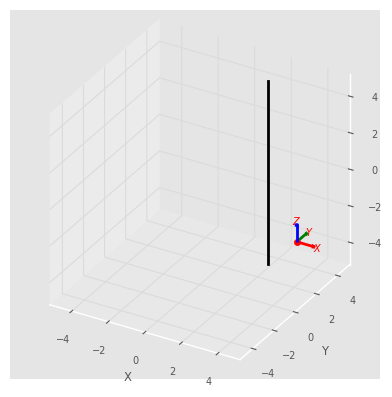

In [103]:
X0 = transl(3, 4, -4)
plotvol3(5)
trplot(S.exp(0).A @ X0, style="rgb", width=2)
L = S.line()
L.plot("k", linewidth=2)

이제 for 문을 이용하여 $\theta$를 $0~{\rm rad}$에서 $15~{\rm rad}$로 키워가며 $X_0$를 회전시키면, 다음의 결과를 얻습니다.

Axes3D(0.125,0.11;0.775x0.77)


[[<mpl_toolkits.mplot3d.art3d.Line3D at 0x1ab53135f70>]]

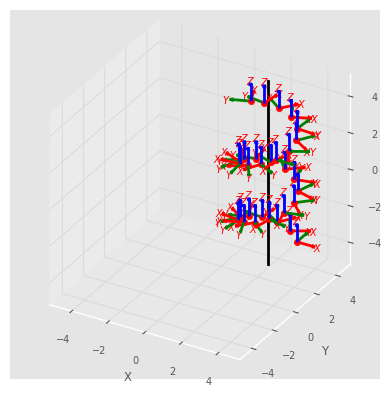

In [104]:
X0 = transl(3, 4, -4)
plotvol3(5)
for theta in np.arange(0, 15, 0.5):
    trplot(S.exp(theta).A @ X0, style="rgb", width=2)
L = S.line()
L.plot("k", linewidth=2)

### **Topic 5 : Transform of Twists via Adjoint Mapping**

In [106]:
Tab = sm.SE3.Tx(-2) * sm.SE3.Rz(-pi/2) * sm.SE3.Rx(pi/2)
print("Adjoint mapping for T_{ab} : \n", Tab.Ad())

Adjoint mapping for T_{ab} : 
 [[ 6.12323400e-17  6.12323400e-17 -1.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-1.00000000e+00  3.74939946e-33 -6.12323400e-17  0.00000000e+00
   2.00000000e+00  1.22464680e-16]
 [ 0.00000000e+00  1.00000000e+00  6.12323400e-17  2.00000000e+00
  -7.49879891e-33  1.22464680e-16]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  6.12323400e-17
   6.12323400e-17 -1.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -1.00000000e+00
   3.74939946e-33 -6.12323400e-17]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  6.12323400e-17]]


In [105]:
Vb = [1, 2, 3, 1, 0, 0]
Va = Tab.Ad() @ Vb
print("Spatial velocity in {a} frame : \n", Va)

Spatial velocity in {a} frame : 
 [-3.000000e+00 -1.000000e+00  4.000000e+00  6.123234e-17 -1.000000e+00
  0.000000e+00]
